In [1]:
import xml
import xml.etree.ElementTree as ET
import os
from os import path
import glob
from collections import defaultdict, Counter, OrderedDict
import numpy as np

from utils import get_ent_info, get_clusters_from_xml
from plot_utils import initialize_bar_plot

import matplotlib.pyplot as plt
import numpy as np

# Change Matplotlib Parameters
plt.rc('text', usetex=True)  # Setting to use latex font; may require installing the TeX fonts
plt.rc('axes', labelcolor='b', edgecolor='k', 
       labelsize=18, titlesize=18)
plt.rcParams['font.size'] = 14
plt.rcParams['xtick.labelsize'] =16
plt.rcParams['ytick.labelsize'] =16

In [2]:
root_dir = "/home/shtoshni/Research/events/data/red/"
source_dir = path.join(root_dir, "data/source")
source_files = glob.glob("{}/*/*".format(source_dir))

ann_dir = path.join(root_dir, "data/mod_annotation")
ann_files = glob.glob("{}/*/*".format(ann_dir))

split_types = ["train", "dev", "test"]

In [3]:
def get_all_ent_info(xml_root):
    """Given the root of elment tree, returns the entity and events."""
    ent_map = {}
    ent_list = []

    for elem in xml_root.iter('entity'):
        span_str = list(elem.iter('span'))[0].text
        span_start, span_end = [int(endpoint) for endpoint in span_str.split(",")]
        elem_id = list(elem.iter('id'))[0].text
        elem_type = list(elem.iter('type'))[0].text

        ent_map[elem_id] = (elem_type, (span_start, span_end))
        ent_list.append([(span_start, span_end), elem_id])
    
    assert(len(ent_list) == len(ent_map))
    # Sort entity list on the basis of span start index
    ent_list = sorted(ent_list, key=lambda x: x[0][0])

    return ent_map, ent_list

### Next load list of files in each split 

In [5]:
def prefix_to_data_files(split_files):
    source_files, annotation_files = [], []
    for split_file in split_files:
        source_files.append(path.join(source_dir, split_file))
        annotation_files.append(path.join(ann_dir, split_file) + ".RED-Relation.gold.completed.xml")
        
    return source_files, annotation_files

In [6]:
split_info_dir = path.join(root_dir, "docs")

split_to_file_list = OrderedDict()
for split in split_types:
    split_list_file = path.join(split_info_dir, f'{split}.txt')
    split_files = set([file_name.strip() for file_name in open(split_list_file).readlines()])
    split_to_file_list[split] = split_files

### Stat function

In [26]:
def get_stats(source_files, annotation_files, split="train"):
    span_width = []
    elem_type_count = OrderedDict()
    
    for (source_file, annotation_file) in zip(source_files, annotation_files):
        # Read the source document
        doc_str = "".join(open(source_file).readlines())

        # Parse the XML
        tree = ET.parse(annotation_file)
        root = tree.getroot()

        # Get entity and cluster information from the annotation file
        ent_map, ent_list = get_all_ent_info(root)
        
        for (elem_id, (elem_type, (span_start, span_end))) in ent_map.items():
            if elem_type not in elem_type_count:
                elem_type_count[elem_type] = 0
            elem_type_count[elem_type] += 1
        
            
    def bar_plot(labels, counts, xlim=None, title=None):
        fig, ax = initialize_bar_plot()

        bar_width=0.3
        cur_bar = ax.bar(bar_width + np.arange(len(labels)), counts,
                      color=['teal', 'r'], width=bar_width, alpha=0.6)
        plt.xticks(np.arange(len(labels)) + bar_width, labels, rotation=0) 

        for rect, height, label in zip(cur_bar, counts, labels):
            label = f'{height}'
            ax.text(rect.get_x() + rect.get_width()/2, height + 0.25, label, ha='center', va='bottom')
        
        if xlim is not None:
            plt.xlim(*xlim)
            
        if title is not None:
            plt.title(title)
            
        plt.xticks(rotation=45)
        plt.show()
        

    # Span type
    labels, counts = zip(*sorted(list(elem_type_count.items())))
    bar_plot(labels, counts)
        
        

### Train Stats

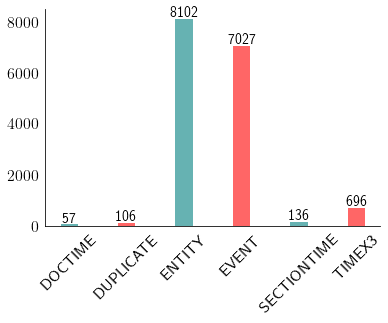

In [27]:
source_files, annotation_files = prefix_to_data_files(split_to_file_list["train"])
get_stats(source_files, annotation_files, split="train")

### Dev stats

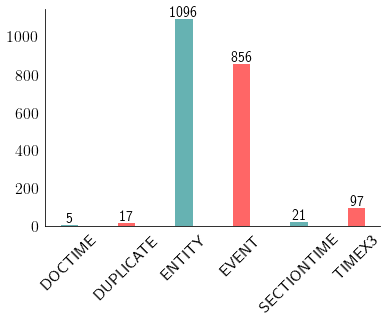

In [28]:
source_files, annotation_files = prefix_to_data_files(split_to_file_list["dev"])
get_stats(source_files, annotation_files, split="dev")